Joshua Haas - 2023 
Multiagent Systems Individual Assigment 



In [611]:
import matplotlib.pyplot as plt
from scipy.stats import beta
import pandas as pd
import numpy as np
import random
from collections import defaultdict
import seaborn as sns
from collections import deque
import random

#### Exercise 1.1

In [ ]:
max_k = 202
pop = 10**6
number_pop = 10

def monte_carlo_simulation(p, max_k):
    batch_dict = defaultdict(list)

    for iteration in range(number_pop):
        population = np.random.uniform(low=0, high=1, size=pop)

        for k in range(2, max_k):
            batch_size = k
            number_batches = pop // batch_size
            remainder_batch = pop % batch_size
            positive_batches = 0 

            if remainder_batch != 0: 
                number_batches += 1 

            start = 0
            for batch_index in range(number_batches):
                if batch_index == number_batches - 1 and remainder_batch != 0:
                    end = start + remainder_batch
                else:
                    end = start + batch_size

                batch = population[start:end]
                start = end

                if any(value <= p for value in batch):
                    positive_batches += 1
            batch_dict[k].append(positive_batches*k+number_batches)
            averages = {k: sum(values)/number_pop for k, values in batch_dict.items()}
    return averages

p_list = [0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001, 0.0005, 0.0002, 0.0001]
results = []
for p in p_list: 
    mc = monte_carlo_simulation(p, max_k)
    optimal_k = min(mc, key=mc.get)
    optimal_value = mc[optimal_k]
    results.append((p, optimal_k, optimal_value))

### Exercise 1.2

In [615]:
# Printing the results in a structured format
print("Probability (p) | Optimal Batch Size (k) | Expected Tests")
print("-" * 60)
for p, k, value in results:
    print(f"{p:<15} | {k:<23} | {value}")

Probability (p) | Optimal Batch Size (k) | Expected Tests
------------------------------------------------------------
0.1             | 4                       | 593626.4
0.05            | 5                       | 425958.0
0.025           | 7                       | 305045.9
0.01            | 11                      | 195418.8
0.005           | 15                      | 139201.0
0.0025          | 21                      | 98360.2
0.001           | 33                      | 62597.8
0.0005          | 46                      | 44546.8
0.0002          | 69                      | 28582.8
0.0001          | 102                     | 19830.6


In [619]:
for p, k, value in results:
    print(f"{p}, {k}, {value}, {10**6 - value}, {100 - round(( (value/ 10**6 ) * 100),1)}")


0.1, 4, 593626.4, 406373.6, 40.6
0.05, 5, 425958.0, 574042.0, 57.4
0.025, 7, 305045.9, 694954.1, 69.5
0.01, 11, 195418.8, 804581.2, 80.5
0.005, 15, 139201.0, 860799.0, 86.1
0.0025, 21, 98360.2, 901639.8, 90.2
0.001, 33, 62597.8, 937402.2, 93.7
0.0005, 46, 44546.8, 955453.2, 95.5
0.0002, 69, 28582.8, 971417.2, 97.1
0.0001, 102, 19830.6, 980169.4, 98.0


### Exercise 2.1 


In [ ]:
number_of_simulations = 10000
dictionary_mean = defaultdict(list)
dictionary_variance = defaultdict(list)
p_list = [0.2,0.4,0.6,0.8]
for p in p_list:
    alpha = 1
    beta = 1
    for i in range(number_of_simulations):
        mean = 1 / (1 + (beta/alpha))
        variance = (alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1))
        dictionary_mean[p].append(mean)
        dictionary_variance[p].append(variance)
        r = np.random.binomial(1, p)
        if r == 1:
            alpha = alpha + 1
        else:
            beta = beta + 1


In [ ]:

# Create a figure with a specified size
plt.figure(figsize=(20, 12))

# Subplot for p = 0.2
plt.subplot(221)  # 2 rows, 2 cols, subplot 1
plt.plot(dictionary_mean[0.2], label='Mean')
plt.plot(dictionary_variance[0.2], label='Variance', color='red')
plt.axhline(y=0.2, color='blue', linestyle='--', label='p-value')
plt.xlabel('Iteration',weight='bold')
plt.ylabel('Values',weight='bold')
plt.title('Mean and Variance Beta Distribution for p=0.4',weight='bold')
plt.legend()

# Subplot for p = 0.4
plt.subplot(222)  # 2 rows, 2 cols, subplot 2
plt.plot(dictionary_mean[0.4], label='Mean')
plt.plot(dictionary_variance[0.4], label='Variance', color='red')
plt.axhline(y=0.4, color='blue', linestyle='--', label='p-value')
plt.xlabel('Iteration',weight='bold')
plt.ylabel('Values',weight='bold')
plt.title('Mean and Variance Beta Distribution for p=0.4',weight='bold')
plt.legend()

# Subplot for p = 0.6
plt.subplot(223)  # 2 rows, 2 cols, subplot 3
plt.plot(dictionary_mean[0.6], label='Mean')
plt.plot(dictionary_variance[0.6], label='Variance', color='red')
plt.axhline(y=0.6, color='blue', linestyle='--', label='p-value')
plt.xlabel('Iteration',weight='bold')
plt.ylabel('Values',weight='bold')
plt.title('Mean and Variance Beta Distribution for p=0.6',weight='bold')
plt.legend()

# Subplot for p = 0.8
plt.subplot(224)  # 2 rows, 2 cols, subplot 4
plt.plot(dictionary_mean[0.8], label='Mean')
plt.plot(dictionary_variance[0.8], label='Variance', color='red')
plt.axhline(y=0.8, color='blue', linestyle='--', label='p-value')
plt.xlabel('Iteration',weight='bold')
plt.ylabel('Values',weight='bold')
plt.title('Mean and Variance Beta Distribution for  p=0.8',weight='bold')
plt.legend()

# Adjust the layout so that there is no overlap between subplots
plt.tight_layout()

plt.savefig('Beta_dist.png')

# Close the figure to free up memory
plt.close()


### Exercise 2.2

In [ ]:
# Number of arms
K = 3
# Set three p values 
#p = [random.uniform(0,1) for i in range(3)]
p = [0.4, 0.2, 0.8]
# Initialize alpha and beta parameters for each arm
alpha_params = np.ones(K)
beta_params = np.ones(K)

# Thompson sampling function for K-armed bandit problem
def thompson_sampling(alpha_params, beta_params, p, trials=1000):
    # Store the history of chosen arms and rewards
    p = p 
    chosen_arms = []
    rewards = []
    alpha = []
    beta = []
    for i in range(trials):
        # Sample from the beta distribution for each arm
        sampled_theta = [np.random.beta(a,b) for a, b in zip(alpha_params, beta_params)]
        # Select the arm with the highest sampled value
        chosen_arm = np.argmax(sampled_theta)
        chosen_arms.append(chosen_arm)
        
        reward = np.random.binomial(1, p=p[chosen_arm])  # p=0.5 is a placeholder
        rewards.append(reward)
        alpha.append(alpha_params[chosen_arm])
        beta.append(beta_params[chosen_arm])
        
        # Bayesian update rule 
        alpha_params[chosen_arm] += reward
        beta_params[chosen_arm] += 1 - reward

    return chosen_arms, rewards, alpha_params, beta_params,alpha, beta,p

# Run the Thompson sampling
chosen_arms, rewards, alpha_params, beta_params,alpha,beta, p = thompson_sampling(alpha_params, beta_params,p)

In [ ]:

def plot_beta_distributions_from_lists(alpha_values, beta_values,p):
    plt.figure(figsize=(10, 6))

    # Generating a range of x values between 0 and 1
    x_values = np.linspace(0, 1, 500)

    # Iterating through the alpha and beta values
    for i in range(len(alpha_values)):
        alpha_val = alpha_values[i]
        beta_val = beta_values[i]

        # Calculating the probability density function for the Beta distribution
        y_values = beta_dist.pdf(x_values, alpha_val, beta_val)

        # Plotting the Beta distribution for this alpha and beta pair
        plt.plot(x_values, y_values, label=f'α={alpha}, β={beta_val}')

        #plt.axvline(x=p[i], color='k', linestyle='--', label=f'p={p[i]} (True value for Arm {i+1})')

    plt.axvline(x=p[0],color='k', linestyle='--')
    plt.axvline(x=p[1], color='k', linestyle='--')
    plt.axvline(x=p[2], color='k', linestyle='--')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title(f'Beta Distributions for Different α and β Values and p-values:  {[round(p,2) for p in p]}')

    plt.savefig('Beta2.png')

    plt.close()

plot_beta_distributions_from_lists(alpha, beta,p)


### Exercise 2.3

Perform numerical experiments in which you compare Thompson sampling with the UCB.
Use total regret (provide the precise definition that you’re using) as your performance
criteria. For UCB, experiment with different values of the hyperparameter c. The fact
that, for Thompson sampling, you don’t need to specify an hyperparameter, is a distinct
advantage.

In [ ]:
# Thompson Sampling 
K = 3
# p = [random.uniform(0,1) for i in range(3)]
p = [0.3, 0.1, 0.7]
# Thompson sampling function for K-armed bandit problem
def thompson_sampling(alpha_params, beta_params,K, p, trials=1000):
    # Store the history of chosen arms and rewards
    p = p 
    chosen_arms = []
    rewards = []
    expected_regrets = np.array([])

    for i in range(trials):

        # Sample from the beta distribution for each arm
        sampled_theta = [np.random.beta(a,b) for a, b in zip(alpha_params, beta_params)]

        # Select the arm with the highest sampled value
        chosen_arm = np.argmax(sampled_theta)
        chosen_arms.append(chosen_arm)

        reward = np.random.binomial(1, p=p[chosen_arm])
        rewards.append(reward)

        regret_i = max(p) - p[chosen_arm]
        expected_regrets = np.append(expected_regrets,[regret_i])

        # Update the Paramters
        alpha_params[chosen_arm] += reward
        beta_params[chosen_arm] += 1 - reward
        

    return chosen_arms, rewards, alpha_params, beta_params, expected_regrets

# Intialize Beta and alpha values
alpha_params = np.ones(K)
beta_params = np.ones(K)
chosen_arms, rewards, alpha_params, beta_params, expected_regrets_th = thompson_sampling(alpha_params, beta_params,K,p)


In [ ]:
# plt.figure(figsize=(10, 5))
# plt.plot(expected_regrets_th.cumsum())
# plt.title('Expected Regret Over Iterations')
# plt.xlabel('Iterations')
# plt.ylabel('Expected Regret')
# plt.grid(True)
# plt.show()

In [ ]:
K = 3 
#should be the same 
true_p = [0.3, 0.1, 0.7]
simul = 1000

def ucb_algorithm(num_arms, rewards, counts, total_count,c):
    ucb_values = [0.0 for _ in range(num_arms)]

    if total_count == 0:
        return random.randint(0,num_arms)
    
    for arm in range(num_arms):
        if counts[arm] == 0: 
            Qa = np.infty
            upper_bound = 0
        else:
            Qa = rewards[arm] / counts[arm]
            upper_bound = np.sqrt((np.log(total_count) / counts[arm]) * c)
        ucb_values[arm] = Qa + upper_bound
    return np.argmax(ucb_values)   

def simulations(simul,k,true_p,c):
    rewards = [0.0 for _ in range(k)]
    counts = [0.0 for _ in range(k)]
    total_count = 0
    expected_regrets = np.array([])

    
    for _ in range(simul):
        chosen_arm = ucb_algorithm(k,rewards,counts,total_count,c)
        rewards[chosen_arm] += np.random.binomial(1,true_p[chosen_arm])
        counts[chosen_arm] += 1
        regret = max(true_p) - true_p[chosen_arm]
        expected_regrets = np.append(expected_regrets,[regret])


        total_count += 1
    
    return expected_regrets
expected_regrets_c01 = simulations(simul,K,true_p,c=0.1)
expected_regrets_c05 = simulations(simul,K,true_p,c=0.5)
expected_regrets_c1 = simulations(simul,K,true_p,c=1)
expected_regrets_c15 = simulations(simul,K,true_p,c=1.5)
expected_regrets_c2 = simulations(simul,K,true_p,c=2)
expected_regrets_c25 = simulations(simul,K,true_p,c=2.5)

In [ ]:
# Make Subplots with varying C-values
# Plotting the subplots in a grid of 3 rows and 2 columns
plt.figure(figsize=(12, 15))  # Adjust size to accommodate 3 rows of subplots

# First row, first subplot for c = 0.1
plt.subplot(321)
plt.plot(expected_regrets_c01.cumsum(), label='UCB')
plt.plot(expected_regrets_th.cumsum(), label='Thompson Sampling')
plt.title('Total Regret: UCB with c=0.1 vs. Thompson Sampling',weight='bold')
plt.legend()
plt.xlabel('Iterations',weight = 'bold')
plt.ylabel('Total Regret',weight = 'bold')
plt.grid(True)

# First row, second subplot for c = 0.5
plt.subplot(322)
plt.plot(expected_regrets_c05.cumsum(), label='UCB')
plt.plot(expected_regrets_th.cumsum(), label='Thompson Sampling')
plt.title('Total Regret: UCB with c=0.5 vs. Thompson Sampling',weight='bold')
plt.legend()
plt.xlabel('Iterations',weight = 'bold')
plt.ylabel('Total Regret',weight = 'bold')
plt.grid(True)

# Second row, first subplot for c = 1
plt.subplot(323)
plt.plot(expected_regrets_c1.cumsum(), label='UCB')
plt.plot(expected_regrets_th.cumsum(), label='Thompson Sampling')
plt.title('Total Regret: UCB with c= 1 vs. Thompson Sampling',weight='bold')
plt.legend()
plt.xlabel('Iterations',weight = 'bold')
plt.ylabel('Total Regret',weight = 'bold')
plt.grid(True)

# Second row, second subplot for c = 1.5
plt.subplot(324)
plt.plot(expected_regrets_c15.cumsum(), label='UCB')
plt.plot(expected_regrets_th.cumsum(), label='Thompson Sampling')
plt.title('Total Regret: UCB with c= 1.5 vs. Thompson Sampling',weight='bold')
plt.legend()
plt.xlabel('Iterations',weight = 'bold')
plt.ylabel('Total Regret', weight = 'bold')
plt.grid(True)

# Third row, first subplot for c = 2
plt.subplot(325)
plt.plot(expected_regrets_c2.cumsum(), label='UCB')
plt.plot(expected_regrets_th.cumsum(), label='Thompson Sampling')
plt.title('Total Regret: UCB with c=2 vs. Thompson Sampling',weight='bold')
plt.legend()
plt.xlabel('Iterations',weight='bold')
plt.ylabel('Total Regret',  weight='bold')
plt.grid(True)

# Third row, second subplot for c = 2.5
plt.subplot(326)
plt.plot(expected_regrets_c25.cumsum(), label='UCB')
plt.plot(expected_regrets_th.cumsum(), label='Thompson Sampling')
plt.title('Total Regret: UCB with c=2.5 vs. Thompson Sampling',weight='bold')
plt.legend()
plt.xlabel('Iterations',weight='bold')
plt.ylabel('Total Regret', weight='bold')
plt.grid(True)

# Adjust layout to fit
plt.tight_layout()


plt.savefig('total_regret.png')

# Close the figure to free up memory
plt.close()

### Exercise 3.1
Reinfrcement Learning
Q-learning

In [10]:
def create_cliff_environment(rows=4, cols=21):
    environment = np.zeros((rows, cols))
    return environment

def get_reward(state):
    if state == 83:
        reward = 20
        game_ends = True
        #print("Goal reached")
    elif 64 <= state <= 82:
        reward = -100
        game_ends = True
       # print("Fell off cliff")
    else:
        reward = -1
        game_ends = False
    return reward, game_ends


def update_agent_position(agent_position, selected_action):
    row, col = agent_position
    # Moves: 0=up, 1=down, 2=left, 3=right
    if selected_action == 0 and row > 0:
        row -= 1
    elif selected_action == 1 and row < 3:
        row += 1
    elif selected_action == 2 and col > 0:
        col -= 1
    elif selected_action == 3 and col < 20:
        col += 1
    new_position = (row, col)
    return new_position











def create_q_table(rows=4,cols=21):
    q_table = np.zeros((4,rows*cols))
    return q_table





def get_state(agent_position, q_table):
    row, col = agent_position

    state = 21 * row + col

    state_action = q_table[:, int(state)]
    maximum_state_value = np.amax(state_action) # return the state value with for the highest action
    return state, maximum_state_value




def choose_action(state, q_table, epsilon):

    if(np.random.random() < epsilon):
        action = np.random.choice(4)
    else:
        action = np.argmax(q_table[:, state])

    return action




def update_qtable(q_table, state, action, reward,max_state, gamma=0.9, alpha=0.5):
    update_q_value = q_table[action, state] + alpha * (reward + (gamma * max_state) - q_table[action, state])
    q_table[action, state] = update_q_value
    return q_table

def find_optimal_policy(q_table, rows=4, cols=21):

    # Initialize the environment and agent's position
    start_position=(3, 0)
    goal_position=(3, 20)
    optimal_policy = np.zeros((rows, cols))
    agent_pos = start_position
    optimal_policy[agent_pos] = 1
    count = 0
    # Iterate until the goal position is reached
    while agent_pos != goal_position:
        state, _ = get_state(agent_pos, q_table)
        best_next_move = np.argmax(q_table[:, state])
        agent_pos = update_agent_position(agent_pos, best_next_move)
        optimal_policy[agent_pos] = 1
        count += 1
        if count > 300:
            optimal_policy_found = False
            return "No optimal policy", optimal_policy_found
    optimal_policy_found = True
    return optimal_policy, optimal_policy_found

def filter_np_arrays(lst):
    return [item for item in lst if isinstance(item, np.ndarray)]








# Help Visualziation to index the correct states for the cliff
def create_environment(rows=4, cols=21):
    environment = np.arange(0, rows * cols ).reshape(rows, cols)
    return environment

# Create the environment with specified dimensions and values
environment = create_environment()

def create_cliff_environment(rows=4, cols=21):
    # This function is needed to visualize the path of the agent during the game play
    environment = np.zeros((rows, cols))
    return environment

cliff_environment = create_cliff_environment()

def reshape_q_table(q_table, rows, cols):
    mean_q_values = np.mean(q_table, axis=0)
    return mean_q_values.reshape(rows, cols)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
import numpy as np
q_table = create_q_table()
get_state((3,0), q_table)

(63, 0.0)

### Q-learning

In [12]:
# Q-learning algorithm
def q_learning(epsilon,episodes=1000, gamma=0.9, alpha=0.5):
    # Initialize the Q-table
    q_table = create_q_table()
    # Initialize enviroment
    rewards = []

    for episode in range(episodes):
        environment = create_cliff_environment()
        agent_position = (3,0)
        environment[agent_position] = 1
        game_ends = False
        reward_cum = 0
        while not game_ends:
            agents_state, _= get_state(agent_position,q_table)
            action = choose_action(agents_state, q_table,epsilon)
            move_agent =  update_agent_position(agent_position, action)
            environment[move_agent] = 1
            next_state,max_state = get_state(move_agent,q_table)

            reward, game_ends = get_reward(next_state)
            reward_cum += reward
            q_table = update_qtable(q_table, agents_state, action, reward,max_state, gamma, alpha)
            agent_position = move_agent
        rewards.append(reward_cum)


    return q_table,rewards
epsilon = 0.1
q_table_qlearning, rewards_qlearning  = q_learning(epsilon)

In [8]:
optimal_path_qlearning,optimal_policies_found = find_optimal_policy(q_table_qlearning)


In [9]:
optimal_path_qlearning

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.]])

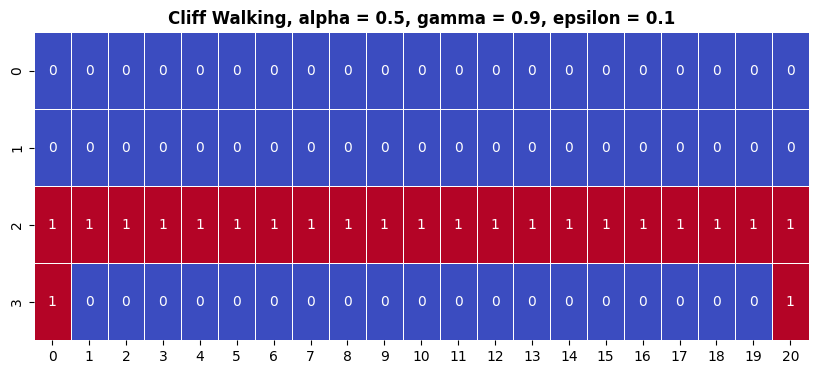

<Figure size 640x480 with 0 Axes>

In [17]:
# Find optimal Policy Q-learning and Plot it
optimal_path_qlearning,optimal_policies_found = find_optimal_policy(q_table_qlearning)
plt.figure(figsize=(10, 4))
sns.heatmap(optimal_path_qlearning, annot= True, cmap="coolwarm", cbar=False, linewidths=.5,)
plt.title("Cliff Walking, alpha = 0.5, gamma = 0.9, epsilon = 0.1", weight='bold')
plt.show()
plt.savefig('Q_learning_cliff.png')

In [723]:
# q_table_ht = reshape_q_table(q_table_qlearning, 4, 21)
# plt.figure(figsize=(10, 4))
# sns.heatmap(q_table_ht, annot= False, cmap="coolwarm", cbar=True, linewidths=.5,)
# plt.title("Cliff Walking, alpha = 0.5, gamma = 0.9, epsilon = 0.1", weight='bold')
# plt.show()
# plt.savefig('Q_learning_cliff-heatmap.png')

#### Replay Buffer Q-learning


In [474]:
# Q-learning with replay buffer
def create_replay_buffer(max_size=100):
    return deque(maxlen=max_size)

def store_transition(buffer, transition):
    buffer.append(transition)

def sample_transitions(buffer, batch_size):
    return random.sample(buffer, min(batch_size, len(buffer)))


In [724]:
def q_learning_with_replay(epsilon,episodes=1000, gamma=0.9, alpha =0.5, batch_size=10):
    # Initialize the Q-table
    q_table = create_q_table()
    # Initialize environment
    rewards = []
    # Initialize replay buffer
    replay_buffer = create_replay_buffer(max_size=300)

    for episode in range(episodes):
        environment = create_cliff_environment()
        agent_position = (3, 0)
        environment[agent_position] = 1
        game_ends = False
        reward_cum = 0
        while not game_ends:
            agents_state, _ = get_state(agent_position, q_table)
            action = choose_action(agents_state, q_table, epsilon)
            move_agent = update_agent_position(agent_position, action)
            environment[move_agent] = 1
            next_state, max_state = get_state(move_agent, q_table)

            reward, game_ends = get_reward(next_state)
            reward_cum += reward

            store_transition(replay_buffer, (agents_state, action, reward, next_state, max_state, game_ends))

            current_buffer_size = len(replay_buffer)
            current_batch_size = min(batch_size, current_buffer_size)
            transitions = sample_transitions(replay_buffer, current_batch_size)

            for trans in transitions:
                state, action, reward, next_state, max_state, game_ends = trans
                q_table = update_qtable(q_table, state, action, reward, max_state, gamma, alpha)

            agent_position = move_agent

        rewards.append(reward_cum)

    return q_table, rewards

In [725]:
rebuffer_result_qlearning1 = dict()
epsilon = 0.1
for i in range(10):
    q_table_sarsa,rewards_sarsa = q_learning_with_replay(epsilon)
    optimal_path, optimal_policy_found = find_optimal_policy(q_table_sarsa)
    if optimal_policy_found == True:
        rebuffer_result_qlearning1[i] = (optimal_path,q_table_sarsa)
    elif i == 9:
        rebuffer_result_qlearning1[i] = (optimal_path,q_table_sarsa)

In [696]:
rebuffer_result_qlearning = dict()

for i in range(10):
    q_table_sarsa,rewards_sarsa = q_learning_with_replay(epsilon)
    optimal_path, optimal_policy_found = find_optimal_policy(q_table_sarsa)
    if optimal_policy_found == True:
        rebuffer_result_qlearning[i] = (optimal_path,q_table_sarsa)
    elif i == 9:
        rebuffer_result_qlearning[i] = (optimal_path,q_table_sarsa)

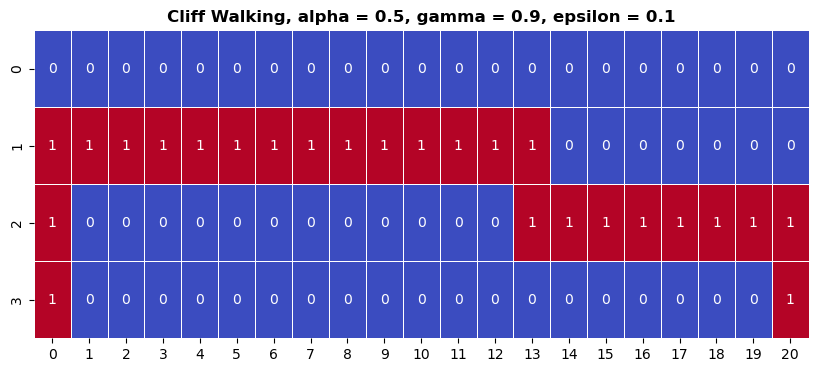

In [722]:
# Plot the heatmaps for the different epsilon values SARSA
plt.figure(figsize=(10, 4))
sns.heatmap(rebuffer_result_qlearning[4][0], annot= True, cmap="coolwarm", cbar=False, linewidths=.5,)
plt.title("Cliff Walking, alpha = 0.5, gamma = 0.9, epsilon = 0.1", weight='bold')
plt.savefig('Q_learning_cliff_replay.png')
plt.show()

# reshaped_qtable = reshape_q_table(rebuffer_result_qlearning[4][1], 4, 21)
# plt.figure(figsize=(10, 4))
# sns.heatmap(reshaped_qtable, annot= False, cmap="coolwarm", cbar=True, linewidths=.5,)
# plt.title("Cliff Walking, alpha = 0.5, gamma = 0.9, epsilon = 0.1", weight='bold')
# plt.savefig('Q_learning_cliff_replay-heat.png')
# plt.show()

#### Sarsa Learning

In [767]:
# Sarsa Learning
def sarsa_learning(epsilon,episodes=1000,gamma=0.9,alpha=0.5):
    # Initialize the Q-table
    q_table = create_q_table()
    rewards = []
    for episode in range(episodes):
        environment_sarsa = create_cliff_environment()

        agent_position = (3,0)
        environment_sarsa[agent_position] = 1
        state_sarsa, _ = get_state(agent_position, q_table)
        action_sarsa = choose_action(state_sarsa, q_table,epsilon)
        game_ends = False
        reward_cum = 0
        while not game_ends:
            agent_position = update_agent_position(agent_position, action_sarsa)
            environment_sarsa[agent_position] = 1
            next_state, _ = get_state(agent_position, q_table)
            reward, game_ends = get_reward(next_state)
            reward_cum += reward
            next_action = choose_action(next_state, q_table, epsilon)

            next_state_q = q_table[next_action][next_state]
            q_table = update_qtable(q_table, state_sarsa, action_sarsa, reward, next_state_q, gamma, alpha)
            state_sarsa = next_state
            action_sarsa = next_action
        rewards.append(reward_cum)

    return q_table, rewards
epsilon =0.1
sarsa_q_table,rewards_sarsa = sarsa_learning(epsilon,alpha=0.5)

Text(0.5, 1.0, 'Cliff Walking, alpha = 0.5, gamma = 0.9, epsilon = 0.1')

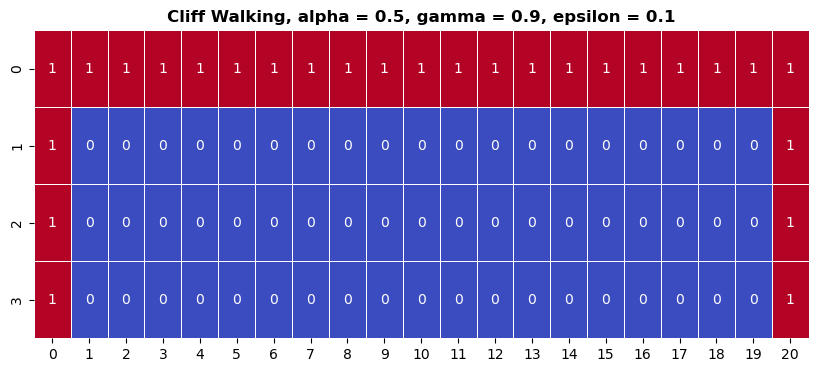

In [768]:
# Find optimal Policy Q-learning and Plot it
optimal_path_sarsa = find_optimal_policy(sarsa_q_table)
plt.figure(figsize=(10, 4))
sns.heatmap(optimal_path_sarsa[0], annot= True, cmap="coolwarm", cbar=False, linewidths=.5,)
plt.title("Cliff Walking, alpha = 0.5, gamma = 0.9, epsilon = 0.1", weight='bold')
#plt.savefig('Sarsa_cliff.png')


#### Sarsa and Q-learning with different epsilon values

In [672]:
# Sarsa Learning with different epsilon values
epsilon_results_sarsa = dict()

for epsilons in np.arange(0.0, 1, 0.1):
    epsilon = round(epsilons,1)
    optimal_policies = []
    for i in range(10):
        q_table_sarsa,rewards_sarsa = sarsa_learning(epsilon,gamma=0.9,alpha=0.1)
        optimal_path, optimal_policy_found = find_optimal_policy(q_table_sarsa)
        if optimal_policy_found == True:
            epsilon_results_sarsa[epsilon] = (optimal_path,q_table_sarsa)
            break
        elif i == 9:
            epsilon_results_sarsa[epsilon] = (optimal_path,q_table_sarsa)

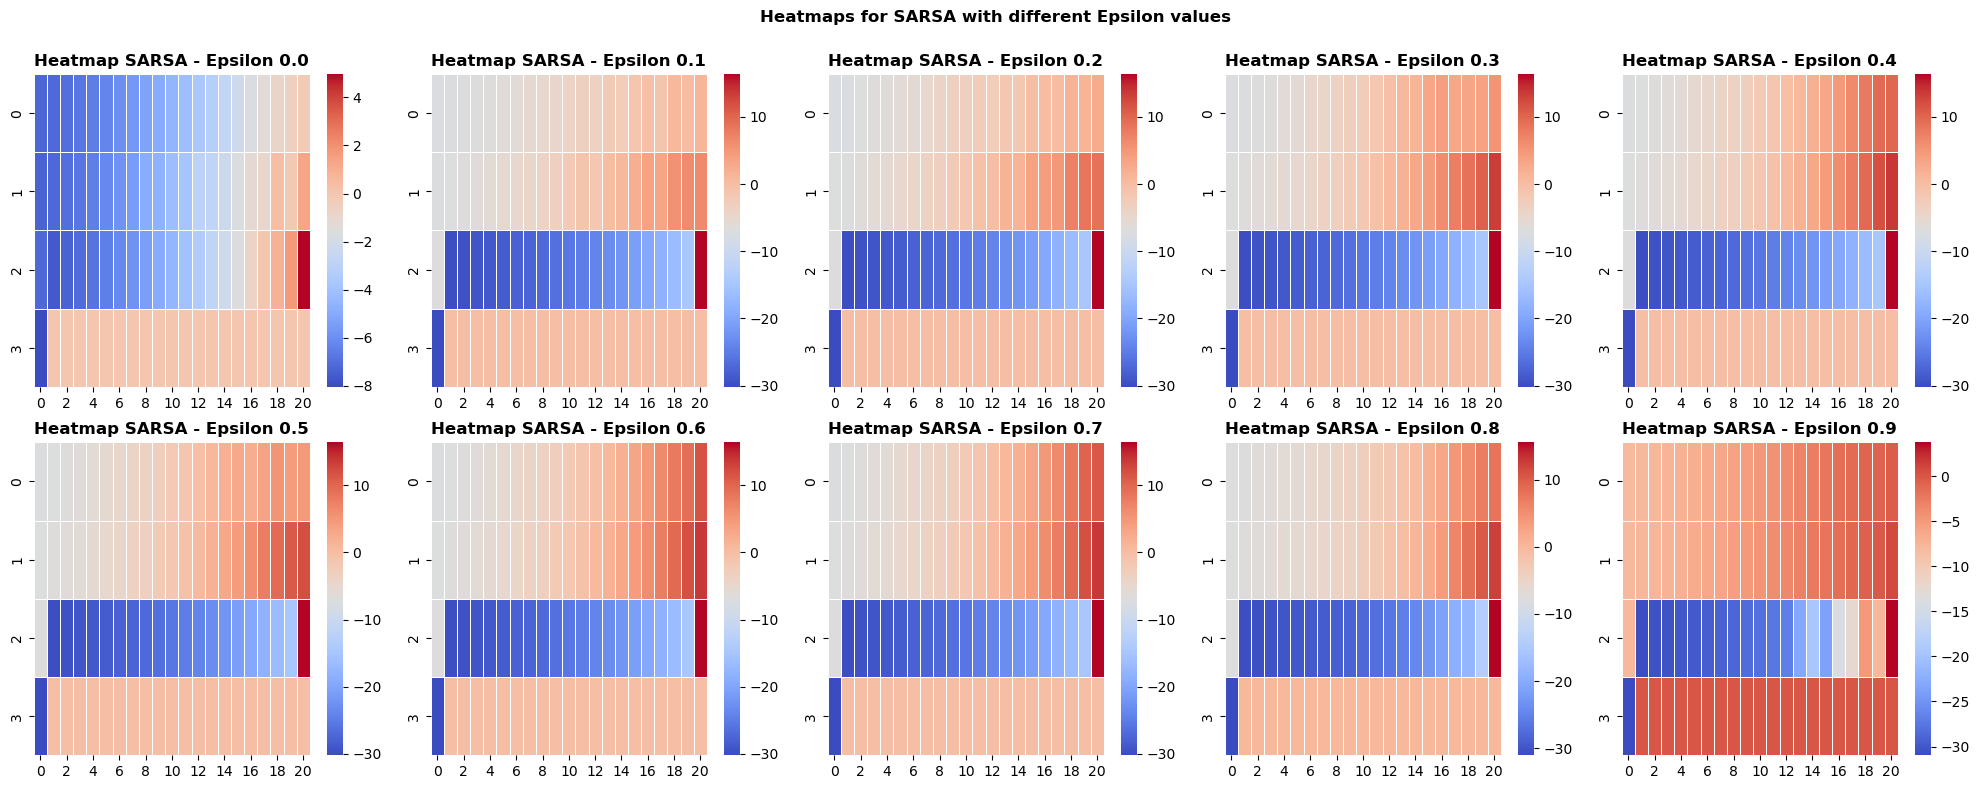

In [665]:
# Plot the heatmaps for the different epsilon values SARSA
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, epsilon in enumerate(sorted(epsilon_results_sarsa.keys())):
    q_table_sarsa_heatmap = reshape_q_table(epsilon_results_sarsa[epsilon][1], 4, 21)

    row, col = i // 5, i % 5

    sns.heatmap(q_table_sarsa_heatmap, annot=False, cmap="coolwarm", cbar=True, linewidths=.5, ax=axes[row, col])
    axes[row, col].set_title(f"Heatmap SARSA - Epsilon {epsilon}", weight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust as needed for title space
plt.suptitle("Heatmaps for SARSA with different Epsilon values", weight='bold')
#plt.savefig('HeatmapSARSA.png')
plt.show()

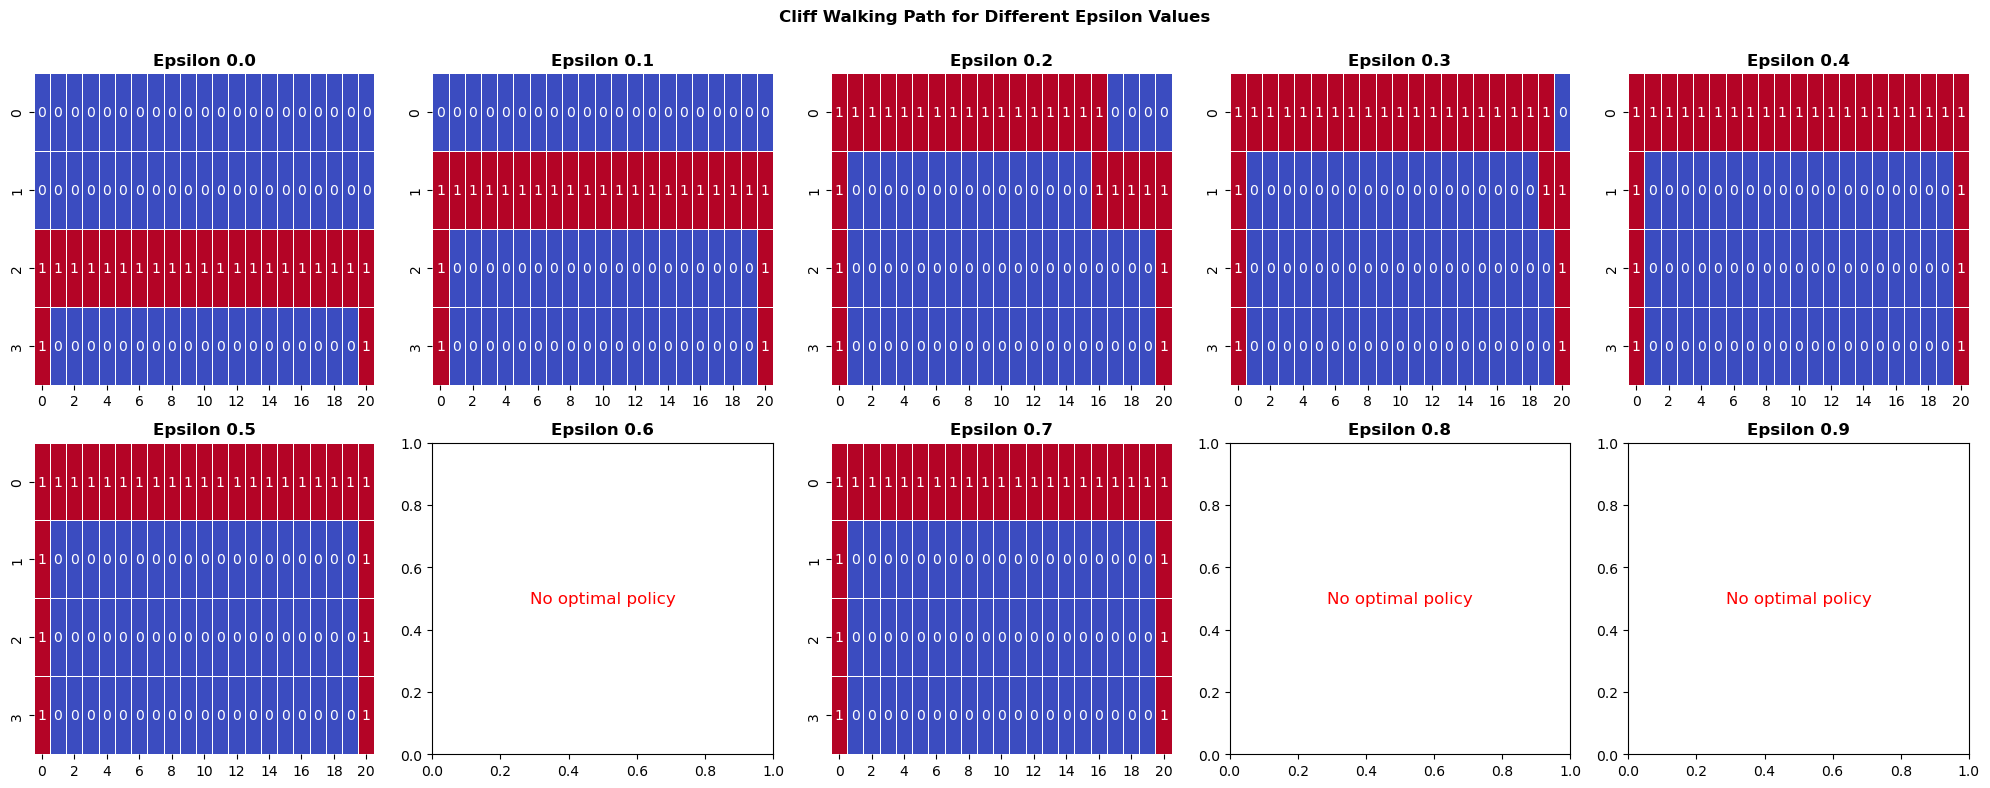

In [590]:
# Plot the Optimal Policies for the different epsilon values SARSA
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))  # Adjust as needed for optimal layout
fig.suptitle("Cliff Walking Path for Different Epsilon Values", weight='bold')

axes = axes.flatten()

for i, epsilon in enumerate(sorted(epsilon_results_sarsa.keys())):
    ax = axes[i]
    policy_or_message = epsilon_results_sarsa[epsilon][0]

    # Check if the policy is a string (i.e., no policy found)
    if isinstance(policy_or_message, str):
        ax.text(0.5, 0.5, policy_or_message,
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes,
                fontsize=12, color='red')
    else:
        sns.heatmap(policy_or_message, annot=True, cmap="coolwarm", cbar=False, linewidths=.5, ax=ax)

    ax.set_title(f"Epsilon {epsilon}", weight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust as needed for title space
plt.savefig('Optimal-policies-Sarsa.png')
plt.show()

#### Q-learning with different epsilon values

In [671]:
# Q-learning with different epsilon values
epsilon_results_qlearning = dict()
for epsilons in np.arange(0.0, 1, 0.1):
    epsilon = round(epsilons,1)
    optimal_policies = []
    for i in range(10):
        q_table_qlearning,rewards_sarsa = q_learning(epsilon,gamma=0.9,alpha=0.1)
        optimal_path, optimal_policy_found = find_optimal_policy(q_table_qlearning)
        if optimal_policy_found == True:
            epsilon_results_qlearning[epsilon] = (optimal_path,q_table_qlearning)
            break
        elif i == 9:
            epsilon_results_qlearning[epsilon] = (optimal_path,q_table_qlearning)

In [643]:
# Plot the heatmaps for the different epsilon values Qlearning
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, epsilon in enumerate(sorted(epsilon_results_qlearning.keys())):
    q_table_qlearning_heatmap = (epsilon_results_qlearning[epsilon][1],4,21)
    q_table_qlearning_heatmap = q_table_qlearning_heatmap.reshape((4, 21))

    row, col = i // 5, i % 5

    sns.heatmap(q_table_qlearning_heatmap, annot=False, cmap="coolwarm", cbar=True, linewidths=.5, ax=axes[row, col])
    axes[row, col].set_title(f"Heatmap Qlearning - Epsilon {epsilon}", weight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust as needed for title space
plt.suptitle("Heatmaps for SARSA with different Epsilon values", weight='bold')
plt.savefig('HeatmapsQlearning.png')
plt.show()

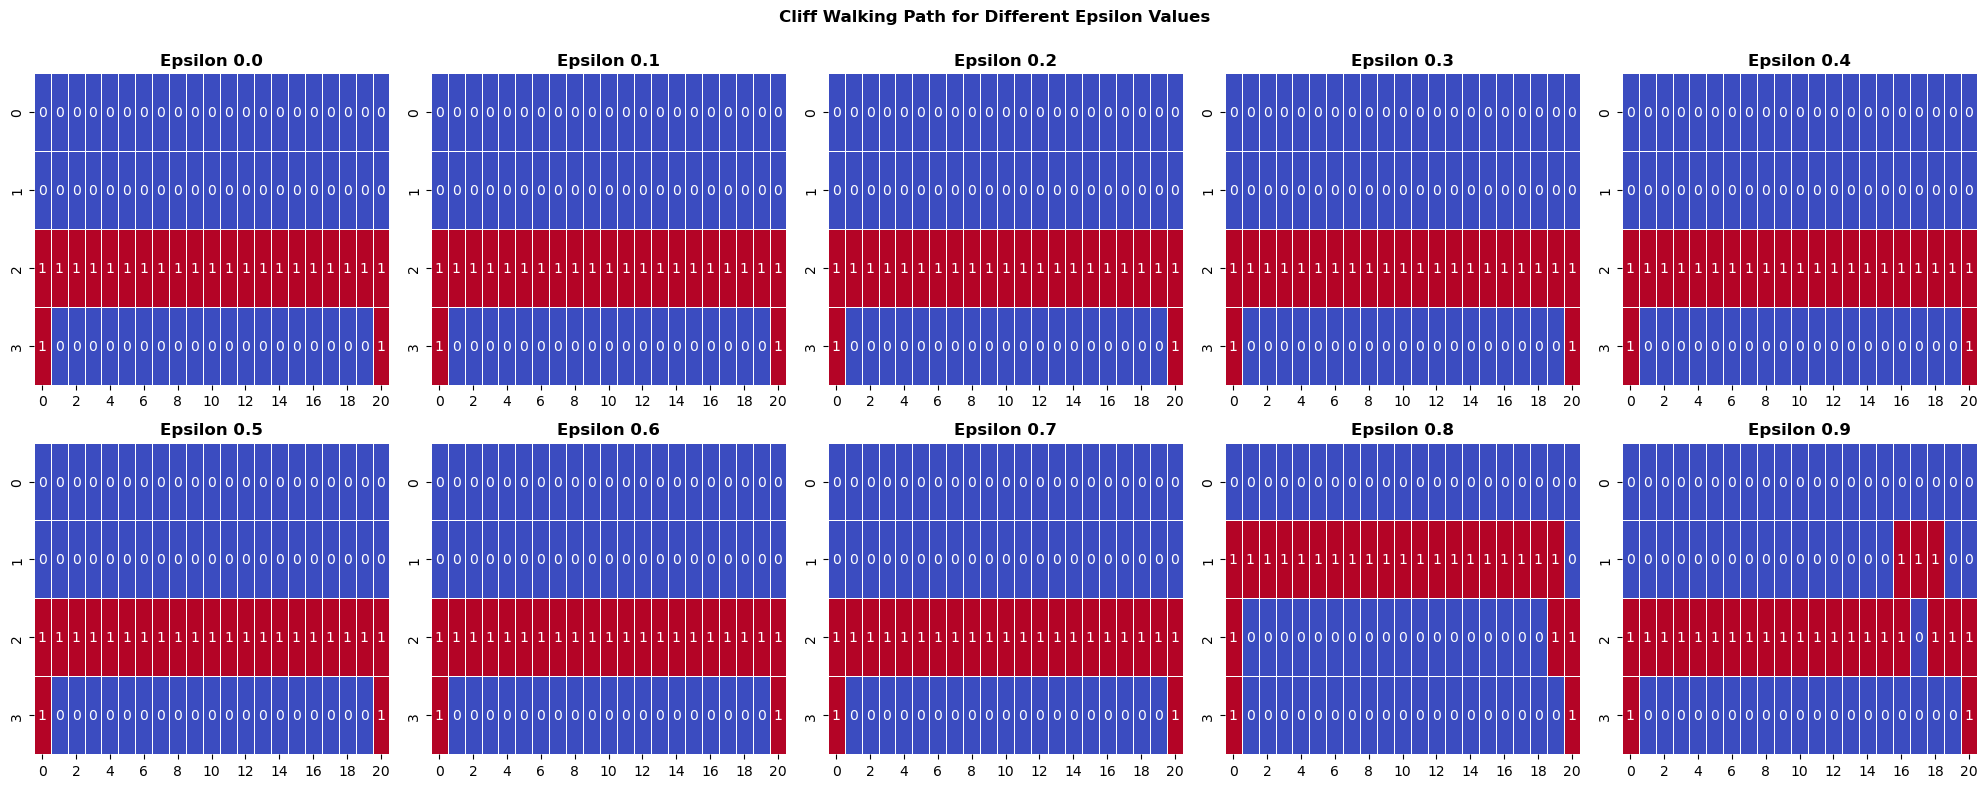

In [610]:
# Plot the Optimal Policy for the different epsilon values Qlearning
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))  # Adjust as needed for optimal layout
fig.suptitle("Cliff Walking Path for Different Epsilon Values", weight='bold')

axes = axes.flatten()

for i, epsilon in enumerate(sorted(epsilon_results_qlearning.keys())):
    ax = axes[i]
    policy_or_message = epsilon_results_qlearning[epsilon][0]

    # Check if the policy is a string (i.e., no policy found)
    if isinstance(policy_or_message, str):
        ax.text(0.5, 0.5, policy_or_message,
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes,
                fontsize=12, color='red')
    else:
        sns.heatmap(policy_or_message, annot=True, cmap="coolwarm", cbar=False, linewidths=.5, ax=ax)

    ax.set_title(f"Epsilon {epsilon}", weight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust as needed for title space
plt.savefig('Optimal-policies-Qlearning.png')
plt.show()

## Exercise 3.3 Snake Pit
### Q-learning with snake pit

In [644]:
# Adapt the Reward function to include the snake pit
def get_reward_snake(state):
    if state == 83:
        reward = 20
        game_ends = True
        #print("Goal reached")
    elif 64 <= state <= 82:
        reward = -100
        game_ends = True
        #print("Fell off cliff")
    elif state == 32 or state == 53:
        reward = -100
        game_ends = False
        #print("Snack Pit")
    else:
        reward = -1
        game_ends = False
    return reward, game_ends


In [737]:
# Q-learning algorithm with snake pit
def q_learning_snake(epsilon,episodes=10000, gamma=0.9, alpha=0.5):
    q_table = create_q_table()
    rewards = []
    for episode in range(episodes):
        environment = create_cliff_environment()
        agent_position = (3,0)
        environment[agent_position] = 1
        game_ends = False
        reward_cum = 0
        while not game_ends:
            agents_state, _= get_state(agent_position,q_table)
            action = choose_action(agents_state, q_table,epsilon)
            move_agent =  update_agent_position(agent_position, action)
            environment[move_agent] = 1
            next_state,maximum_state_value = get_state(move_agent,q_table)

            reward, game_ends = get_reward_snake(next_state)
            reward_cum += reward
            q_table = update_qtable(q_table, agents_state, action, reward,maximum_state_value, gamma, alpha)
            agent_position = move_agent
        rewards.append(reward_cum)

    return q_table,rewards


In [769]:
q_table_qlearning_snake,rewards_qlearning  = q_learning_snake(epsilon = 0.1, alpha=0.5)
optimal_policy_snake_qlearning = find_optimal_policy(q_table_qlearning_snake)


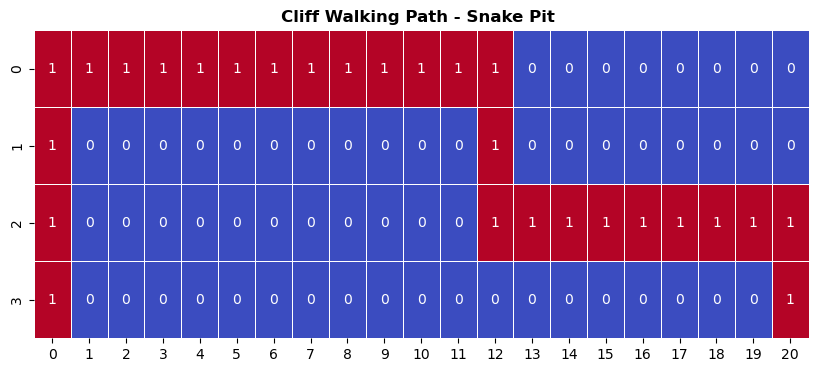

In [771]:
# Optimal policy Snake-pit Q-learning
plt.figure(figsize=(10, 4))
sns.heatmap(optimal_policy_snake_qlearning[0], annot= True, cmap="coolwarm", cbar=False, linewidths=.5,)
plt.title("Cliff Walking Path - Snake Pit ", weight='bold')
plt.savefig('SnakeQ.png')
plt.show()

#### Sarsa Learning with snake pit

In [773]:
# Sarsa Learning with snake pit
def sarsa_learning_snake(epsilon, episodes=1000,gamma=0.9, alpha=0.5):
    # Initialize the Q-table
    q_table = create_q_table()
    rewards = []
    for episode in range(episodes):
        environment_sarsa = create_cliff_environment()

        agent_position = (3,0)
        environment_sarsa[agent_position] = 1
        state_sarsa, _ = get_state(agent_position, q_table)
        action_sarsa = choose_action(state_sarsa, q_table,epsilon)
        game_ends = False
        reward_cum = 0
        while not game_ends:
            agent_position = update_agent_position(agent_position, action_sarsa)
            environment_sarsa[agent_position] = 1
            next_state, _ = get_state(agent_position, q_table)
            reward, game_ends = get_reward_snake(next_state)
            reward_cum += reward
            next_action = choose_action(next_state, q_table, epsilon)

            next_state_q = q_table[next_action][next_state]
            q_table = update_qtable(q_table, state_sarsa, action_sarsa, reward, next_state_q, gamma, alpha)
            state_sarsa = next_state
            action_sarsa = next_action
        rewards.append(reward_cum)

    return q_table, rewards

In [ ]:
optimal_snake_sarsa_policies = []
for i in range(30):
    q_table_sarsa,rewards_sarsa = sarsa_learning_snake(epsilon=0.1)
    optimal_path = find_optimal_policy(q_table_sarsa)
    optimal_snake_sarsa_policies.append(optimal_path)

In [667]:
# Optimal policies Snake-pit SARSA
sarsa_snake  = filter_np_arrays(optimal_snake_sarsa_policies)
for i in range(len(sarsa_snake)):
    print(sarsa_snake[i],"\n")

In [666]:
# Optimal policy Snake-pit Q-learning
plt.figure(figsize=(10, 4))
sns.heatmap(sarsa_snake[1], annot= True, cmap="coolwarm", cbar=False, linewidths=.5,)
plt.title("Cliff Walking Path - Snake Pit ", weight='bold')
plt.savefig('SnakeSarsa.png')
plt.show()